In [42]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 100
#sns.set_style('whitegrid')

In [2]:
#setting connection
path = './input/'
database = path+'database.sqlite'
conn = sqlite3.connect(database)
new = pd.read_csv(path+'E0.csv')

In [3]:
#read
player_data = pd.read_sql('SELECT * FROM Player;',conn)
team_data = pd.read_sql('SELECT * FROM Team;',conn)
country_data = pd.read_sql('SELECT * FROM Country;',conn)
match_data = pd.read_sql('SELECT * FROM Match;',conn)
league_data = pd.read_sql('SELECT * FROM League;',conn)
player_att = pd.read_sql('SELECT * FROM Player_Attributes;',conn)
team_att = pd.read_sql('SELECT * FROM Team_Attributes;',conn)


In [132]:
#given two teams show wins 
#all functions
def api_id(team):
    return (team_data['team_api_id'][team_data.team_long_name == team]).values[0]
def fifa_api_id(team):
    return (team_data['team_fifa_api_id'][team_data.team_long_name == team]).values[0]

def stats(team,data):
    HW = len(data[(data.home_team_api_id == api_id(team)) & (data.home_team_goal > 
                                                                        data.away_team_goal)])
    AW = len(data[(data.away_team_api_id == api_id(team)) & (data.home_team_goal < 
                                                                        data.away_team_goal)])
    HD = len(data[(data.home_team_api_id == api_id(team)) & (data.home_team_goal == 
                                                                        data.away_team_goal)])
    AD = len(data[(data.away_team_api_id == api_id(team)) & (data.home_team_goal == 
                                                                        data.away_team_goal)])
    HL = len(data[(data.home_team_api_id == api_id(team)) & (data.home_team_goal < 
                                                                        data.away_team_goal)])
    AL = len(data[(data.away_team_api_id == api_id(team)) & (data.home_team_goal >                                                                    data.away_team_goal)])
    d = {'HW':HW,'AW':AW,'HD':HD,'AD':AD,'HL':HL,'AL':AL}
    return d

def team_draw_pie(team_stats,name):
    labels = team_stats.keys()
    sizes = team_stats.values()
    explode = [0.03,0.03,0.03,0.03,0.03,0.03]
    colors = ['gold', 'yellowgreen','lightcoral', 'lightskyblue','green','pink']
    plt.pie(sizes,labels = labels,colors=colors,autopct='%1.1f%%',explode=explode)
    #plt.figure(figsize=(100,250))
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.axis('equal')
    #plt.sizes(10,10)
    plt.title(name)
    #plt.legend(team1_stats.keys(),loc = "lower right")
    plt.show()
    return 
def h2h(team1,team2):
    #wins,draw,loss
    data = match_data[((match_data.home_team_api_id == api_id(team1)) & 
                      (match_data.away_team_api_id == api_id(team2))) |
                      ((match_data.home_team_api_id == api_id(team2)) & 
                      (match_data.away_team_api_id == api_id(team1)))]
    
    team1_stats = stats(team1,data)
    team2_stats = stats(team2,data)
    d = {team1:team1_stats,team2:team2_stats}
    d = (pd.DataFrame(d)).transpose()
    return d
    
def h2h_draw_pie(h2h_stats):
    team1 = h2h_stats.index[0]
    team2 = h2h_stats.index[1]
    team1_w = h2h_stats.ix[team1]['AW']+h2h_stats.ix[team1]['HW']
    team2_W = h2h_stats.ix[team2]['AW']+h2h_stats.ix[team2]['HW']
    draw = h2h_stats.ix[team1]['HD']+h2h_stats.ix[team1]['AD']
    labels = team1,team2,'draw'
    sizes = team1_w,team2_W,draw
    explode = [0.03,0.03,0.03]
    colors = ['gold', 'yellowgreen','lightcoral', 'lightskyblue','green','pink']
    plt.pie(sizes,labels = labels,colors=colors,autopct='%1.1f%%',explode=explode)
    #plt.figure(figsize=(100,250))
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.axis('equal')
    #plt.sizes(10,10)
    #plt.title('%svs%s'%(team1,team2))
    #plt.legend(team1_stats.keys(),loc = "lower right")
    plt.show()
    return
def h2h_draw_bar(h2h_stats):
    t1 = h2h_stats.ix[0].values
    t2 = h2h_stats.ix[1].values
    team1 = h2h_stats.index[0]
    team2 = h2h_stats.index[1]
    ind = np.arange(len(h2h_stats.columns))  # the x locations for the groups
    width = 0.35       # the width of the bars

    figure,ax = plt.subplots()
    rects1 = ax.bar(ind, t1, width, color='r')

    rects2 = ax.bar(ind + width, t2, width, color='y')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('matches')
    #ax.set_title('Scores by group and gender')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(h2h_stats.columns)

    ax.legend((rects1[0], rects2[0]), (team1, team2))
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    ax.axes.set_ylim(0,max(max(t1),max(t2))+max(max(t1),max(t2))/5)
    #print(max(t2))
    plt.show()
    return 
def all_stats(team1,team2):
    data = match_data[((match_data.home_team_api_id == api_id(team1)) | 
                      (match_data.away_team_api_id == api_id(team1))) |
                      ((match_data.home_team_api_id == api_id(team2)) | 
                      (match_data.away_team_api_id == api_id(team2)))]
    team1_stats = stats(team1,data)
    team2_stats = stats(team2,data)
    d = {team1:team1_stats,team2:team2_stats}
    d = (pd.DataFrame(d)).transpose()
    return d

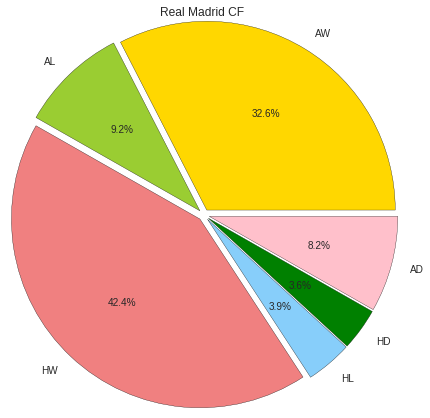

In [133]:
#team = 'FC Barcelona'
#plt.subplot(211)
team = 'Real Madrid CF'
team_stats = stats(team,match_data)
team_draw_pie(team_stats,team)


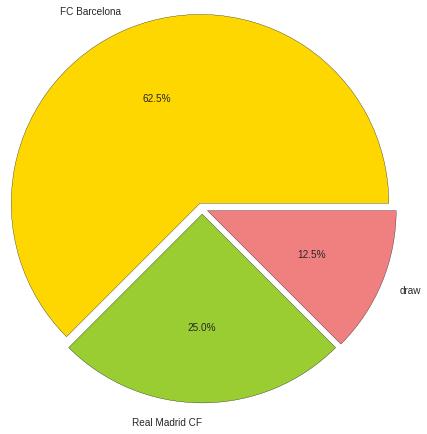

In [134]:
#head to head
team1 = "FC Barcelona"
team2 = "Real Madrid CF"
h2h_stats = h2h(team1,team2)
h2h_draw_pie(h2h_stats)
#sns.countplot(h2h_stats.ix[0])

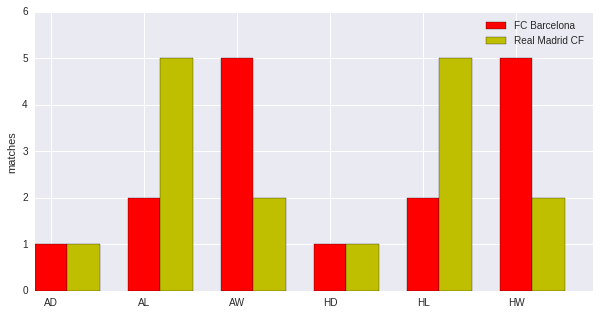

In [135]:
#head to head bar plot

team1 = "FC Barcelona"
team2 = "Real Madrid CF"
h2h_stats = h2h(team1,team2)
h2h_draw_bar(h2h_stats)

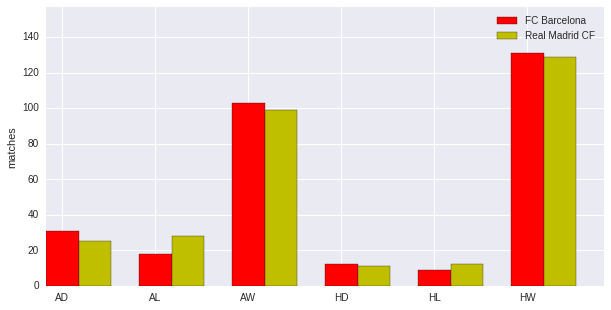

In [136]:
team1 = "FC Barcelona"
team2 = "Real Madrid CF"
teams_stats = all_stats(team1,team2)
h2h_draw_bar(teams_stats)